In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [300]:
movie = pd.read_csv(r"C:\Users\HW\Downloads\IMDb.csv")

In [301]:
movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
movie.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [307]:
movie['Duration']= movie['Duration'].str.replace('min','').apply(pd.to_numeric)

#changing datatype with some string replacing
movie["Votes"]=movie["Votes"].replace("$5.16M", 516)
movie["Votes"] = pd.to_numeric(movie['Votes'].str.replace(',',''))

In [ ]:
movie.isnull().sum()

In [235]:
movie.shape

(15509, 10)

In [256]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


<Axes: >

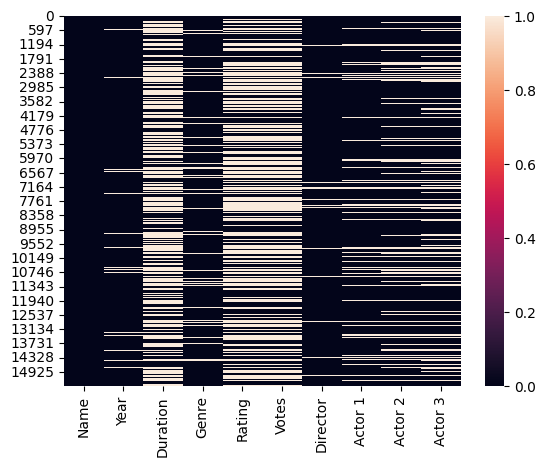

In [24]:
#visualizing null values
sns.heatmap(movie.isnull())

In [308]:
#dropping null values
movie.dropna(subset=['Year'],inplace=True)
movie.dropna(subset=['Genre'],inplace=True)

In [309]:
#filling null values
movie['Rating'].fillna(movie['Rating'].mode().max(),inplace=True)
movie['Duration'].fillna(movie['Duration'].mean(),inplace=True)
movie['Votes'].fillna(movie['Votes'].mean(),inplace=True)

In [290]:
movie.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [291]:
movie.duplicated().sum()

0

In [199]:
movie.describe()

,Year,Duration,Rating,Votes
count,5659.000000,5659.000000,5659.000000,5659.000000
mean,65.247570,87.347588,44.984980,1051.721682
std,19.741839,24.870479,13.806352,551.591951
min,0.000000,0.000000,0.000000,0.000000
25%,52.000000,73.000000,36.000000,541.000000
50%,71.000000,89.000000,47.000000,1042.000000
75%,82.000000,104.000000,55.000000,1531.000000
max,90.000000,173.000000,82.000000,2026.000000


In [39]:
movie.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [44]:
movie['Genre'].unique()

array(['Drama', 'Comedy, Romance', 'Comedy, Drama, Musical',
       'Drama, Romance, War', 'Horror, Mystery, Thriller',
       'Action, Crime, Thriller', 'Horror', 'Horror, Romance, Thriller',
       'Comedy, Drama, Romance', 'Comedy, Drama', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Comedy, Horror', 'Drama, Horror, Mystery',
       'Action, Thriller', 'Action', 'Horror, Mystery, Romance',
       'Horror, Mystery', 'Drama, Horror, Romance',
       'Action, Drama, History', 'Action, Drama, War', 'Thriller',
       'Comedy', 'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'Drama, History', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Adventure, Drama', 'Comedy, Mystery, Thriller', 'Drama, Romance',
       'Crime, Thriller', 'Horror, Sci-Fi, Thriller',
       'Drama, Mystery, Thriller', 'Drama, Family, Musical',
       'Action, Comedy', 'Action, Adventure, Fantasy', 'Documentary',
       'Drama, Horro

In [46]:
movie['Rating'].value_counts()

Rating
6.8     200
6.5     192
6.2     190
6.6     163
7.1     163
       ... 
2.0       2
9.7       1
10.0      1
1.4       1
1.1       1
Name: count, Length: 83, dtype: int64

In [126]:
movie.groupby('Year')['Rating'].mean().sort_values(ascending = False)

Year
(1952)    7.212500
(1957)    7.080645
(1944)    7.075000
(1940)    7.050000
(1953)    6.955000
            ...   
(1995)    5.310937
(2002)    5.281111
(2003)    5.258772
(2000)    5.178313
(2004)    5.044954
Name: Rating, Length: 91, dtype: float64

In [158]:
movie[['Rating','Name']]

,Rating,Name
1,7.0,#Gadhvi (He thought he was Gandhi)
3,4.4,#Yaaram
5,4.7,...Aur Pyaar Ho Gaya
6,7.4,...Yahaan
8,5.6,?: A Question Mark
...,...,...
15493,6.1,Zubaan
15494,6.2,Zubeidaa
15503,5.8,Zulm Ki Zanjeer
15505,4.5,Zulmi


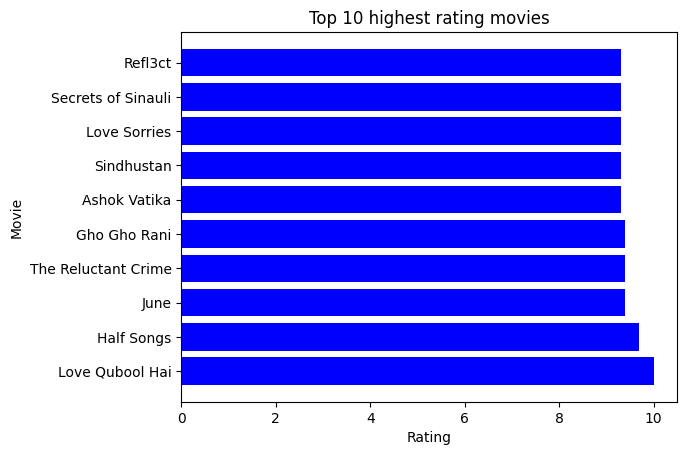

In [63]:
top_rated = movie.sort_values(by = 'Rating', ascending = False).head(10)
plt.barh(top_rated['Name'],top_rated['Rating'],color = 'blue')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('Top 10 highest rating movies')
plt.show()


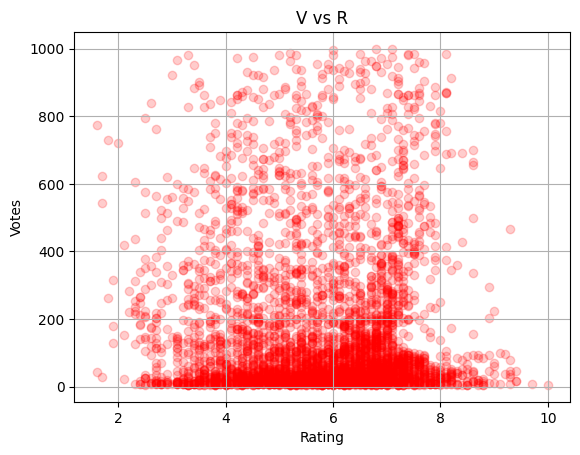

In [76]:
movie['Votes'] = pd.to_numeric(movie['Votes'],errors= 'ignore')
plt.scatter(movie['Rating'],movie['Votes'],alpha = 0.2,color = 'r')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('V vs R')
plt.grid(True)
plt.show()


C:\Users\HW\AppData\Local\Temp\ipykernel_10296\638521267.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'No. of movies',y = 'Director',data = director_count.head(10) ,palette = 'viridis')


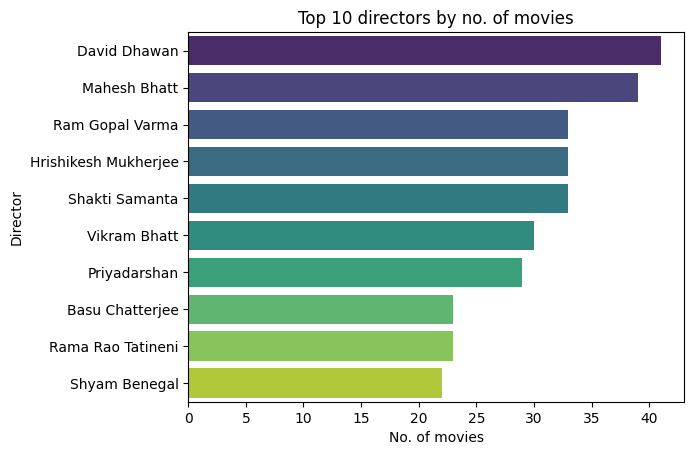

In [99]:
director_count = movie['Director'].value_counts().reset_index()
director_count.columns = ['Director', 'No. of movies']
sns.barplot(x = 'No. of movies',y = 'Director',data = director_count.head(10) ,palette = 'viridis')
plt.xlabel('No. of movies')
plt.ylabel('Director')
plt.title('Top 10 directors by no. of movies')
plt.show()

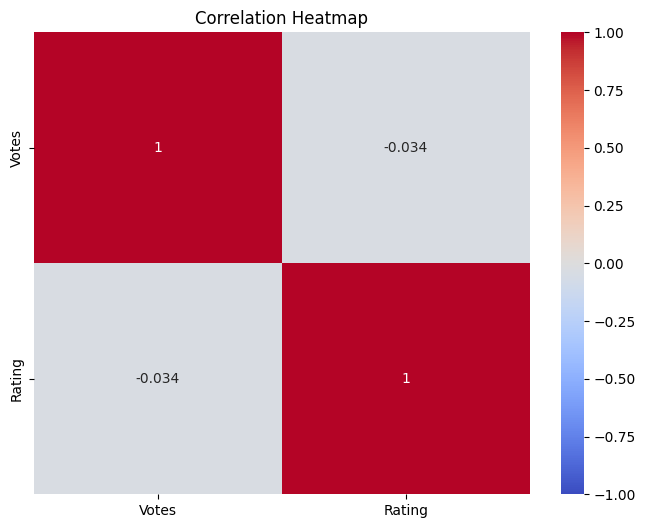

In [124]:
n_columns = ['Votes','Rating']
correlation = movie[n_columns].corr()
plt.figure(figsize = (8,6))
sns.heatmap(correlation,annot = True,cmap = 'coolwarm',vmax = 1,vmin = -1)
plt.title('Correlation Heatmap')
plt.show()

In [310]:
movie.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

(round(movie.isnull().sum()/movie.isnull().count(), 4)*100).sort_values(ascending=False)

Name        0.0
Year        0.0
Duration    0.0
Genre       0.0
Rating      0.0
Votes       0.0
Director    0.0
Actor 1     0.0
Actor 2     0.0
Actor 3     0.0
dtype: float64

In [311]:
# Extracting the numeric part from the 'Year' column
movie['Year'] = movie['Year'].str.extract('(\d+)').astype(float)


# Encoding categorical variables based on mean ratings
actor1_encoding_map = movie.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()['Rating']
actor2_encoding_map = movie.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()['Rating']
actor3_encoding_map = movie.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()['Rating']
director_encoding_map = movie.groupby('Director').agg({'Rating': 'mean'}).to_dict()['Rating']
genre_encoding_map = movie.groupby('Genre').agg({'Rating': 'mean'}).to_dict()['Rating']

movie['actor1_encoded'] = round(movie['Actor 1'].map(actor1_encoding_map), 1)
movie['actor2_encoded'] = round(movie['Actor 2'].map(actor2_encoding_map), 1)
movie['actor3_encoded'] = round(movie['Actor 3'].map(actor3_encoding_map), 1)
movie['director_encoded'] = round(movie['Director'].map(director_encoding_map), 1)
movie['genre_encoded'] = round(movie['Genre'].map(genre_encoding_map), 1)

# Drop original categorical columns
movie.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)

# Define features and target variable
X = movie[['Year', 'Duration', 'Votes', 'actor1_encoded', 'actor2_encoded', 'actor3_encoded', 'director_encoded', 'genre_encoded']]
y = movie['Rating']

In [312]:
#splitting training data
from sklearn.model_selection import train_test_split
x = movie[['Year', 'Duration','Votes']]
y = movie['Rating']
x_train , x_test , y_train ,y_test = train_test_split(x,y, test_size = 0.2,random_state = 42)


In [313]:
#training data using linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [314]:
model.fit(x_train,y_train)

LinearRegression()

In [317]:
md = model.predict(x_test)

In [318]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Linear Regression Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, md))
print('Mean Absolute Error:', mean_absolute_error(y_test, md))
print('R2 Score:', r2_score(y_test, md))


Linear Regression Metrics:
Mean Squared Error: 1.2497879904891174
Mean Absolute Error: 0.8110627442264857
R2 Score: 0.05406243307085978


In [320]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rf_pred = rfr.predict(x_test)


# Evaluate Random Forest Regressor
print('\nRandom Forest Regressor Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, rf_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_pred))
print('R2 Score:', r2_score(y_test, rf_pred))


Random Forest Regressor Metrics:
Mean Squared Error: 1.0240906358719577
Mean Absolute Error: 0.6316014412098392
R2 Score: 0.22488789155949962
